# **ENTREGA 2. PROYECTO IA 2024.2**

In [ ]:
!pip install kaggle

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import json

!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


# **DESCARGAMOS LOS ARCHIVOS DE LA COMPETENCIA**

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/content/'

data = {"username":"santiagozapataocampo","key":"b259feb4cf68ae6aee099b023ec2945c"}
with open('kaggle.json','w') as file:
  json.dump(data, file, indent=4)

!kaggle competitions download -c udea-ai4eng-20242

!unzip \*.zip && rm *.zip

!wc *.csv

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)

 94% 19.0M/20.1M [00:00<00:00, 96.9MB/s]
100% 20.1M/20.1M [00:00<00:00, 88.2MB/s]
Archive:  udea-ai4eng-20242.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               
   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total
shape of loaded dataframe (692500, 12)


# **REVISION DE LOS DATOS**



In [ ]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


**Cantidad de datos**

In [ ]:
z.shape

(692500, 12)

**Tipos de datos**

In [ ]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_EDUCACIONMADRE             668836 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 11  RENDIMIENTO_GLOBAL              692500 non-null  object
dtypes: int64(2), object(10)
memory

**Datos faltantes**

In [ ]:
z.isna().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_EDUCACIONMADRE,23664


## **VARIABLES CATEGORICAS**

In [ ]:
ccols = [i for i in z.columns if not i in z._get_numeric_data()]
print (ccols)

['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO', 'RENDIMIENTO_GLOBAL']


In [ ]:
for c in ccols:
    print ("%10s"%c, np.unique(z[c].dropna()))

In [ ]:
c="RENDIMIENTO_GLOBAL"
z[c].value_counts()

,count
RENDIMIENTO_GLOBAL,
alto,175619
bajo,172987
medio-bajo,172275
medio-alto,171619


In [ ]:
c="FAMI_TIENEINTERNET"
z[c].value_counts()

,count
FAMI_TIENEINTERNET,
Si,592514
No,73357


In [ ]:
c="ESTU_PAGOMATRICULAPROPIO"
z[c].value_counts()

,count
ESTU_PAGOMATRICULAPROPIO,
No,382201
Si,303801


In [ ]:
c = "ESTU_PRGM_DEPARTAMENTO"
z[c].nunique()

31

In [ ]:
c = "ESTU_PRGM_ACADEMICO"
z[c].nunique()

948

# **GRAFICOS**


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

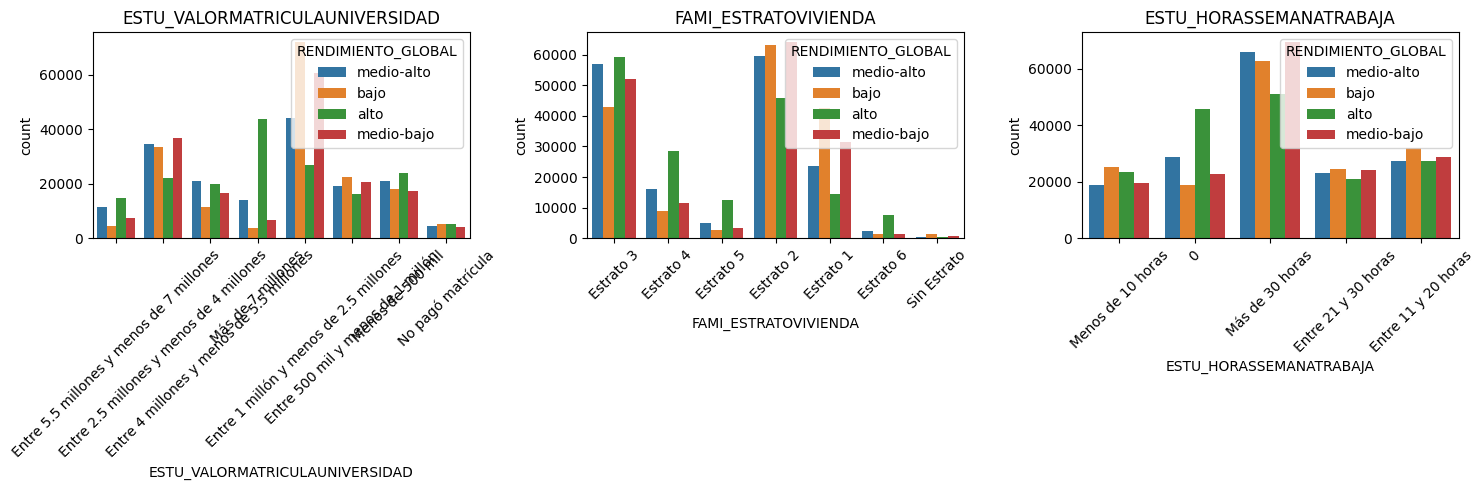

In [ ]:
# Variables que deseas graficar
variables = ["ESTU_VALORMATRICULAUNIVERSIDAD","FAMI_ESTRATOVIVIENDA","ESTU_HORASSEMANATRABAJA"]

plt.figure(figsize=(15, 5))

# Itera sobre las variables y crea un gráfico para cada una
for i, c in enumerate(variables):
    plt.subplot(1, len(variables), i + 1)
    sns.countplot(x=c, hue="RENDIMIENTO_GLOBAL", data=z)
    plt.title(c)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

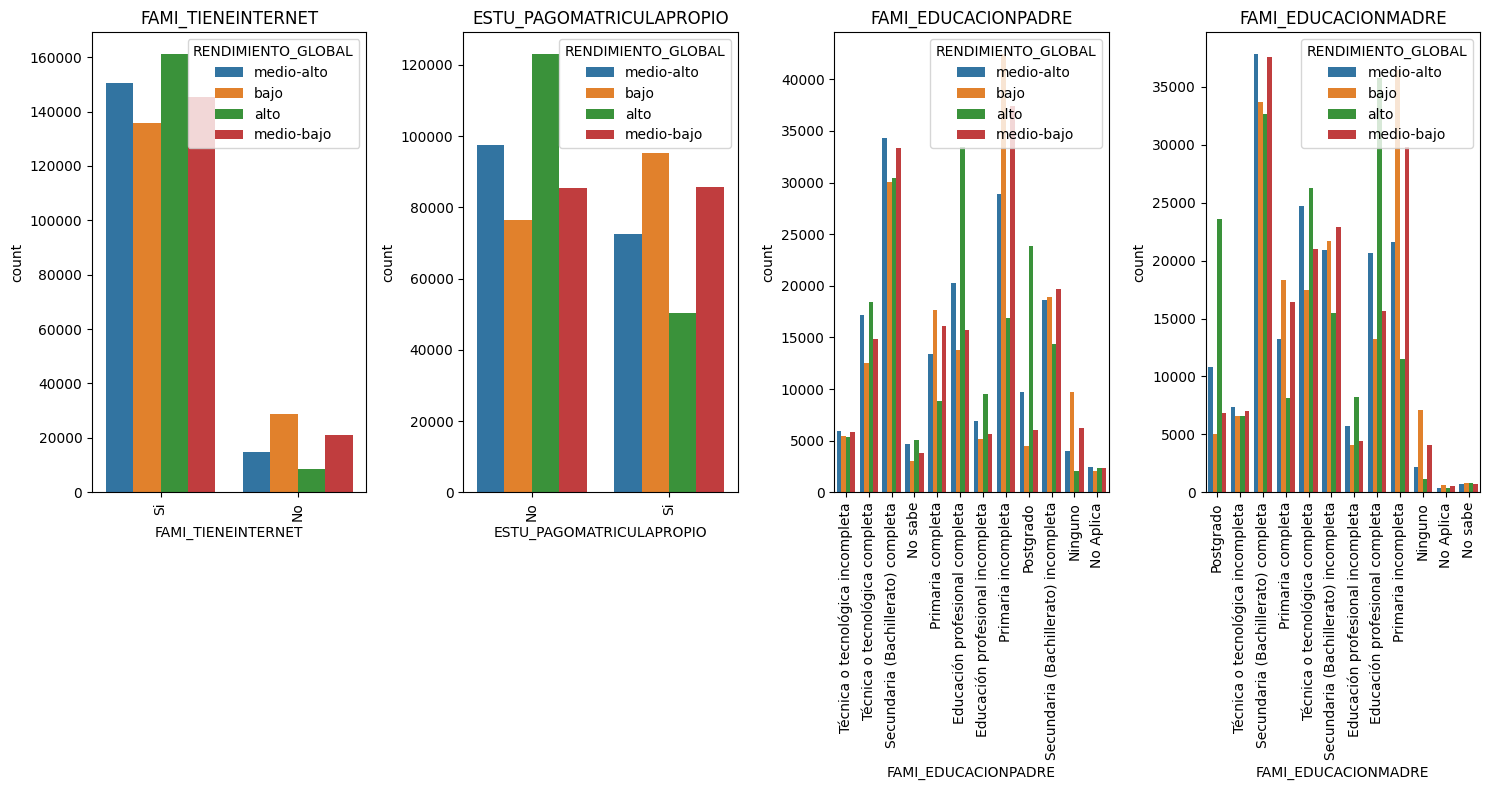

In [ ]:
# Variables que deseas graficar
variables = ["FAMI_TIENEINTERNET","ESTU_PAGOMATRICULAPROPIO","FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE"]

plt.figure(figsize=(15, 8))

# Itera sobre las variables y crea un gráfico para cada una
for i, c in enumerate(variables):
    plt.subplot(1, len(variables), i + 1)
    sns.countplot(x=c, hue="RENDIMIENTO_GLOBAL", data=z)
    plt.title(c)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# **ANÁLISIS**



Primeramente como observamos que todas nuestras varaibles son categoricas para poder verificar la correlacion que existe entre estas y nuestra variable objetivo realizamos la prueba de chi cuadrado.

Podemos ver que todas nuestras columnas son significativas o son realmente relevantes a la hora de predecir el rendimiento de un estudiante

In [ ]:

from scipy.stats import chi2_contingency

chi2_results = []

categorical_columns = z.columns[z.dtypes == 'object'].tolist()
categorical_columns.remove('RENDIMIENTO_GLOBAL')

for column in categorical_columns:
    contingency_table = pd.crosstab(z[column], z['RENDIMIENTO_GLOBAL'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_results.append((column, chi2, p_value))

chi2_results_df = pd.DataFrame(chi2_results, columns=['Variable', 'Chi2', 'p-value'])
chi2_results_df.sort_values(by='p-value', inplace=True)

chi2_results_df

,Variable,Chi2,p-value
0,ESTU_PRGM_ACADEMICO,143741.141869,0.0
1,ESTU_PRGM_DEPARTAMENTO,27731.258060,0.0
2,ESTU_VALORMATRICULAUNIVERSIDAD,97449.256750,0.0
3,ESTU_HORASSEMANATRABAJA,19401.003391,0.0
4,FAMI_ESTRATOVIVIENDA,54486.690822,0.0
5,FAMI_TIENEINTERNET,14575.818283,0.0
6,FAMI_EDUCACIONPADRE,57937.750027,0.0
7,FAMI_EDUCACIONMADRE,62357.048123,0.0
8,ESTU_PAGOMATRICULAPROPIO,27808.078291,0.0


Para comenzar con nuestro analisis primeramente llegamos a la decision de no eliminar ninguna columna debido a que todas tienen una variacion en lavariable respuesta como lo vimos en las anteriores graficos

Vamos a comenzar generando una copia y rellenando los valores faltantes

In [ ]:
z_copy = z.copy()

Vamos a reemplazar los datos faltantes de las columnas con el dato que mas se repita en la misma

In [ ]:
#Variables Categoricas
ccols = [i for i in z.columns if not i in z._get_numeric_data()]
print (ccols)

['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO', 'RENDIMIENTO_GLOBAL']


In [ ]:
#Valor mas repetido
valor_comun = z_copy[ccols].mode().iloc[0]
valor_comun

,0
ESTU_PRGM_ACADEMICO,DERECHO
ESTU_PRGM_DEPARTAMENTO,BOGOTÁ
ESTU_VALORMATRICULAUNIVERSIDAD,Entre 1 millón y menos de 2.5 millones
ESTU_HORASSEMANATRABAJA,Más de 30 horas
FAMI_ESTRATOVIVIENDA,Estrato 2
FAMI_TIENEINTERNET,Si
FAMI_EDUCACIONPADRE,Secundaria (Bachillerato) completa
FAMI_EDUCACIONMADRE,Secundaria (Bachillerato) completa
ESTU_PAGOMATRICULAPROPIO,No
RENDIMIENTO_GLOBAL,alto


In [ ]:
#Reemplazar datos faltantes con los mas repetidos
for column in ccols:
  z_copy[column].fillna(valor_comun[column], inplace=True)

<ipython-input-22-3236515f0ed0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  z_copy[column].fillna(valor_comun[column], inplace=True)


In [ ]:
#Comprobar datos faltantes
pd.isnull(z_copy).sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,0
ESTU_HORASSEMANATRABAJA,0
FAMI_ESTRATOVIVIENDA,0
FAMI_TIENEINTERNET,0
FAMI_EDUCACIONPADRE,0
FAMI_EDUCACIONMADRE,0


# **NORMALIZAR VALORES**

Vamos a comenzar normalizando los valores de la columna **ESTU_VALORMATRICULAUNIVERSIDAD**, los vamos a categorizar con valores del 1 al 7 de la siguiente forma:

**0** = No pagó matrícula

**1** = Menos de 500 mil  

**2** = Entre 500 mil y menos de 1 millón  

**3** = Entre 1 millón y menos de 2.5 millones

**4** = Entre 2.5 millones y menos de 4 millones  

**5** = Entre 4 millones y menos de 5.5 millones

**6** = Entre 5.5 millones y menos de 7 millones
     
**7** = Más de 7 millones   

In [ ]:
z_copy['ESTU_VALORMATRICULAUNIVERSIDAD'].replace(['No pagó matrícula'],[0],inplace=True)
z_copy['ESTU_VALORMATRICULAUNIVERSIDAD'].replace(['Menos de 500 mil'],[1],inplace=True)
z_copy['ESTU_VALORMATRICULAUNIVERSIDAD'].replace(['Entre 500 mil y menos de 1 millón'],[2],inplace=True)
z_copy['ESTU_VALORMATRICULAUNIVERSIDAD'].replace(['Entre 1 millón y menos de 2.5 millones'],[3],inplace=True)
z_copy['ESTU_VALORMATRICULAUNIVERSIDAD'].replace(['Entre 2.5 millones y menos de 4 millones'],[4],inplace=True)
z_copy['ESTU_VALORMATRICULAUNIVERSIDAD'].replace(['Entre 4 millones y menos de 5.5 millones'],[5],inplace=True)
z_copy['ESTU_VALORMATRICULAUNIVERSIDAD'].replace(['Entre 5.5 millones y menos de 7 millones'],[6],inplace=True)
z_copy['ESTU_VALORMATRICULAUNIVERSIDAD'].replace(['Más de 7 millones'],[7],inplace=True)

<ipython-input-24-6391dac62040>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z_copy['ESTU_VALORMATRICULAUNIVERSIDAD'].replace(['Más de 7 millones'],[7],inplace=True)


Para la columna **ESTU_HORASSEMANATRABAJA**, la vamos a categorizar de la siguiente manera:

**0** = 0

**1** = Menos de 10 horas

**2** = Entre 11 y 20 horas

**3** = Entre 21 y 30 horas

**4** = Más de 30 horas


In [ ]:
z_copy['ESTU_HORASSEMANATRABAJA'].replace(['0','Menos de 10 horas','Entre 11 y 20 horas','Entre 21 y 30 horas','Más de 30 horas'],[0,1,2,3,4],inplace=True)

<ipython-input-25-e6670a25e947>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z_copy['ESTU_HORASSEMANATRABAJA'].replace(['0','Menos de 10 horas','Entre 11 y 20 horas','Entre 21 y 30 horas','Más de 30 horas'],[0,1,2,3,4],inplace=True)


Para la columna **FAMI_ESTRATOVIVIENDA** lo haremos como mostramos a continuación:

**0**  = Sin Estrato

**1** = Estrato 1

**2** = Estrato 2

**3** = Estrato 3

**4** = Estrato 4

**5** = Estrato 5

**6** = Estrato 6
    

In [ ]:
z_copy['FAMI_ESTRATOVIVIENDA'].replace(['Estrato 1','Estrato 2','Estrato 3','Estrato 4','Estrato 5','Estrato 6','Sin Estrato'],[1,2,3,4,5,6,0],inplace=True)

<ipython-input-26-093b3f3122fd>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z_copy['FAMI_ESTRATOVIVIENDA'].replace(['Estrato 1','Estrato 2','Estrato 3','Estrato 4','Estrato 5','Estrato 6','Sin Estrato'],[1,2,3,4,5,6,0],inplace=True)


Para nuestra columna **RENDIMIENTO_GLOBAL** la categorizaremos de la siguiente manera:

**1** = Bajo

**2** = Medio-bajo

**3** = Medio-alto

**4** = Alto



In [ ]:
z_copy['RENDIMIENTO_GLOBAL'].replace(['bajo','medio-bajo','medio-alto','alto'],[1,2,3,4],inplace=True)

<ipython-input-27-47da2cb81699>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  z_copy['RENDIMIENTO_GLOBAL'].replace(['bajo','medio-bajo','medio-alto','alto'],[1,2,3,4],inplace=True)
<ipython-input-27-47da2cb81699>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z_copy['RENDIMIENTO_GLOBAL'].replac

Para las columnas con valores de Si y No que son:

**FAMI_TIENEINTERNET**,
**ESTU_PAGOMATRICULAPROPIO**,
les darremos la categorización de la siguiente manera:

**0** = NO

**1** = SI

In [ ]:
z_copy["FAMI_TIENEINTERNET"] = z_copy["FAMI_TIENEINTERNET"].replace({'Si': 1, 'No': 0})
z_copy["ESTU_PAGOMATRICULAPROPIO"] = z_copy["ESTU_PAGOMATRICULAPROPIO"].replace({'Si': 1, 'No': 0})

<ipython-input-28-f6528d1d3bfc>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z_copy["FAMI_TIENEINTERNET"] = z_copy["FAMI_TIENEINTERNET"].replace({'Si': 1, 'No': 0})
<ipython-input-28-f6528d1d3bfc>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z_copy["ESTU_PAGOMATRICULAPROPIO"] = z_copy["ESTU_PAGOMATRICULAPROPIO"].replace({'Si': 1, 'No': 0})


Miramos como va quedando nuestro dataframe con los cambios realizados

In [ ]:
z_copy.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,6,1,3,1,Técnica o tecnológica incompleta,Postgrado,0,3
1,645256,20212,DERECHO,ATLANTICO,4,0,3,0,Técnica o tecnológica completa,Técnica o tecnológica incompleta,0,1
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,4,4,3,1,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,0,1
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,5,0,4,1,No sabe,Secundaria (Bachillerato) completa,0,4
4,989032,20212,PSICOLOGIA,ANTIOQUIA,4,3,3,1,Primaria completa,Primaria completa,0,2


# COLUMNA **ESTU_PRGM_ACADEMICO**

Para esta columna primero decidimos limpiarla primeramente por medio de limpiar los valores que comenzaban con una palabra diferente a su respectivo programa como por ejemplo "PROFESIONAL DE", "PROFESIONAL EN" "PROFESIONAL"

In [ ]:
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].str.replace('PROFESIONAL EN ', '')
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].str.replace('PROFESIONAL DE ', '')
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].str.replace('PROFESIONAL ', '')
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].str.replace('PROGRAMA ', '')

Siguiendo con la agrupacion de valores decidimos agrupar los programas academicos por ejemplo:

Para todas las LICENCIATURAS se decide reemplazar por la palabra LICENCIATURA

Para todo lo relacionado el MARKETING, PUBLICIDAD o MERCADEO se decide reemplazar por la palabra MARKETING

Para todo lo realcionaodo con grandes medios audiovisuales (CINE, TV, FOTOGRAFIA, RADIO) se decide reemplazar por la palabra CIENCIAS AUDIOVISUALES


Para todas las ADMINISTACIONES se decide reemplazar por la palabra ADMINISTRACION


Para todas las INGENIERIAS se decide reemplazar por la palabra INGENIERIA


In [ ]:
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'INGENIERIA' if x.startswith('INGE') else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'LICENCIATURA' if x.startswith('LIC') or x.startswith('Lic') else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'ADMINISTRACION' if x.startswith('ADM')   else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CONTADURIA' if x.startswith('CONT')   else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'COMUNICACION' if x.startswith('COMU')   else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'DEPORTE' if 'DEPORT'  in x else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'PSICOLOGIA' if 'PSIC' in x else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'TRABAJO SOCIAL' if 'TRABAJO SOCIAL' in x else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'DISEÑO' if 'DISE' in x else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'TERAPIA' if 'TERAP' in x else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'GASTRONOMIA' if 'GASTRON' in x else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'VETERINARIA Y ZOOTECNIA' if 'ZOOTECNIA' in x else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'NUTRICION' if 'NUTRIC' in x else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'MARKETING' if ( 'MARKETING' in x or 'PUBLICIDAD' in x or 'MERCAD' in x) else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'MATEMATICAS Y ESTADISTICA' if ('MATE' in x or 'ESTA' in x) else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'ARTES' if 'ARTE' in x else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'PERIODISMO' if 'PERIOD' in x else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'LITERATURA' if 'LITER' in x else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'MUSICA' if ('MUS' in x or 'MÚS' in x) else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'ECONOMIA Y NEGOCIOS' if ('ECONO' in x or 'NEG' in x or 'COME' in x or 'FIN' in x) else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CIENCIAS DE LA TIERRA' if 'GEO' in x else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CIENCIAS AUDIOVISUALES' if ('CINE' in x or 'RADIO' in x or 'TELEV' in x or 'AUDIOV' in x or 'FOTOG' in x) else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'DERECHO' if 'DERECHO' in x else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CIENCIAS POLITICAS' if ( 'POLIT' in x or 'POLÍT' in x) else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'INGENIERIA' if 'INGE' in x else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'QUIMICA' if ('QUIM' in x or 'QUÍM' in x or 'QU¿M' in x) else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CONSTRUCCION' if 'CONST' in x else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'TURISMO' if 'TURIS' in x else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'BIBLIOTECOLOGIA' if 'BIBLIO' in x else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'FILOSOFIA' if 'FILOS' in x else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'FILOLOGIA' if 'FILOL' in x else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'ODONTOLOGIA' if 'ODONTOLOG' in x else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'BIOLOGIA Y MICROBIOLOGIA' if 'BIOL' in x else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'ECOLOGIA' if x.startswith('ECOL')   else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'BACTERIOLOGIA' if 'BACT' in x else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CIENCIAS CULTURALES' if 'CULT' in x else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'INSTRUMENTACION QUIRURGICA' if 'INSTRUMENTACION' in x else x)
z_copy['ESTU_PRGM_ACADEMICO'] = z_copy['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CIENCIAS MARITIMAS Y AERONAUTICAS' if ('MILIT' in x or 'NAVALES' in x or 'NAU' in x) else x)


In [ ]:
c = "ESTU_PRGM_ACADEMICO"
z_copy[c].nunique()

108

Agrupar los programas con menos presencia en otro valor llamado "OTRO PROGRAMA" para poder eliminar estos datos irrelevantes y poder llevar una mejor limpieza

In [ ]:
# Calcula el conteo de cada valor en la columna 'ESTU_PRGM_ACADEMICO'
conteo_valores = z_copy['ESTU_PRGM_ACADEMICO'].value_counts()

# Obtén los valores que tienen menos de N registros
valores_menos_de_20 = conteo_valores[conteo_valores <= 30]
valores_menos_de_20

# Reemplaza los valores que tienen menos de N registros con 'OTRO PROGRAMA'
for valor in valores_menos_de_20.index:
    z_copy.loc[z_copy['ESTU_PRGM_ACADEMICO'] == valor, 'ESTU_PRGM_ACADEMICO'] = 'OTRO PROGRAMA'

In [ ]:
c="ESTU_PRGM_ACADEMICO"
z_copy[c].value_counts()

,count
ESTU_PRGM_ACADEMICO,
INGENIERIA,148434
ADMINISTRACION,127997
LICENCIATURA,66280
DERECHO,53696
CONTADURIA,53066
...,...
AGROINDUSTRIA,42
CIENCIAS AMBIENTALES,40
BIOTECNOLOGIA,39


In [ ]:
z_copy["ESTU_PRGM_ACADEMICO"].nunique()

91

In [ ]:
z_copy["ESTU_PRGM_ACADEMICO"].unique()

array(['ENFERMERIA', 'DERECHO', 'MARKETING', 'ADMINISTRACION',
       'PSICOLOGIA', 'MEDICINA VETERINARIA', 'INGENIERIA', 'TURISMO',
       'LICENCIATURA', 'COMUNICACION', 'CIENCIAS POLITICAS',
       'GESTIÓN DE LA SEGURIDAD Y LA SALUD LABORAL', 'MUSICA',
       'TRABAJO SOCIAL', 'CONTADURIA', 'MATEMATICAS Y ESTADISTICA',
       'VETERINARIA Y ZOOTECNIA', 'SEGURIDAD Y SALUD EN EL TRABAJO',
       'MEDICINA', 'ODONTOLOGIA', 'DISEÑO', 'ECONOMIA Y NEGOCIOS',
       'ARQUITECTURA', 'QUIMICA', 'RELACIONES INTERNACIONALES',
       'INSTRUMENTACION QUIRURGICA', 'TERAPIA', 'FARMACIA', 'ARTES',
       'OPTOMETRIA', 'JURISPRUDENCIA', 'SOCIOLOGIA', 'DEPORTE',
       'LITERATURA', 'CIENCIAS AUDIOVISUALES', 'NUTRICION', 'FILOSOFIA',
       'ENFERMERÍA', 'FILOLOGIA',
       'GERENCIA EN SISTEMAS DE INFORMACION EN SALUD',
       'TRADUCCION INGLES-FRANCES-ESPAÑOL', 'INTRUMENTACION QUIRURGICA',
       'PLANEACION Y DESARROLLO SOCIAL', 'CRIMINALISTICA',
       'BIOLOGIA Y MICROBIOLOGIA',
       'CIENC

#**Columnas ONE-HOT**

In [ ]:
z_encoded = pd.get_dummies(z_copy, columns= ["ESTU_PRGM_ACADEMICO","ESTU_PRGM_DEPARTAMENTO","FAMI_EDUCACIONPADRE","FAMI_EDUCACIONMADRE"])

In [ ]:
z_encoded = z_encoded.astype(int)
z_encoded

,ID,PERIODO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,ESTU_PRGM_ACADEMICO_ACUICUlTURA,ESTU_PRGM_ACADEMICO_ADMINISTRACION,...,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta
0,904256,20212,6,1,3,1,0,3,0,0,...,0,0,0,1,0,0,0,0,0,0
1,645256,20212,4,0,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,308367,20203,4,4,3,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,470353,20195,5,0,4,1,0,4,0,1,...,0,0,0,0,0,0,1,0,0,0
4,989032,20212,4,3,3,1,0,2,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,2,2,2,1,1,3,0,0,...,0,0,0,0,0,0,0,1,0,0
692496,754213,20212,4,4,3,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
692497,504185,20183,3,1,3,1,1,2,0,1,...,0,0,0,0,0,0,0,1,0,0
692498,986620,20195,4,1,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
